In [1]:
import pandas as pd
df = pd.read_csv("Car_sales.csv")
df

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [2]:
df.dtypes

Manufacturer            object
Model                   object
Sales in thousands     float64
4-year resale value     object
Vehicle type            object
Price in thousands      object
Engine size             object
Horsepower              object
Wheelbase               object
Width                   object
Length                  object
Curb weight             object
Fuel capacity           object
Fuel efficiency         object
Latest Launch           object
dtype: object

In [3]:
df.shape

(157, 15)

In [6]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64

In [7]:
df.describe()

,Sales in thousands
count,157.000000
mean,52.998076
std,68.029422
min,0.110000
25%,14.114000
50%,29.450000
75%,67.956000
max,540.561000


In [10]:
df_sorted = df.sort_values(by = 'Price in thousands')
df.head(1)

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14


In [11]:
df.tail(1)

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
156,Volvo,S80,18.969,.,Passenger,36,2.9,201,109.9,72.1,189.8,3.6,21.1,24,14-Nov-15


In [14]:
def find_min_max(column):
    return df[column].min() , df[column].max()

In [15]:
find_min_max('Horsepower')

('.', '92')

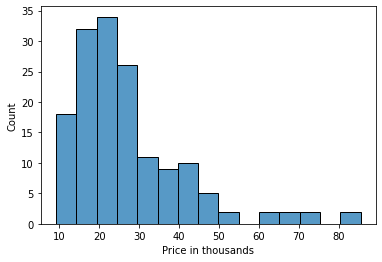

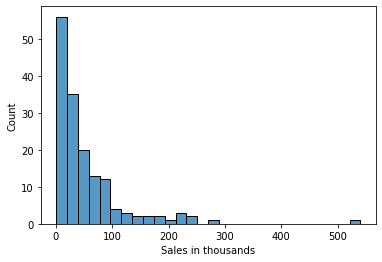

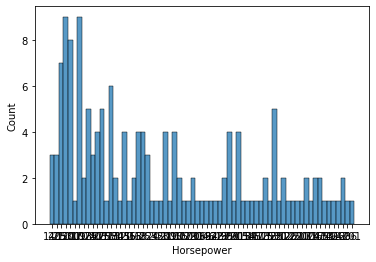

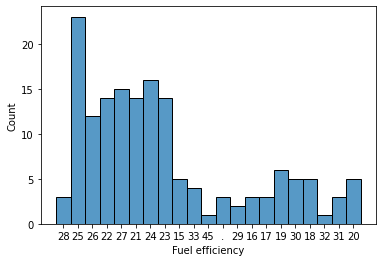

In [25]:
cols = ['Price in thousands','Sales in thousands','Horsepower','Fuel efficiency']
import seaborn as sns
import matplotlib.pyplot as plt
    
for col in cols:
    sns.histplot(x=col  ,data = df)
    #plt.xticks(rotation=90)
    plt.show()

In [34]:
for col in cols:
    df[col] = pd.to_numeric(df[col] ,errors='coerce')
    
#df.dtypes

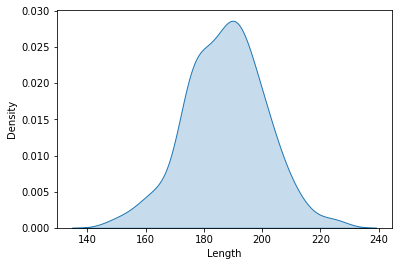

In [36]:
df['Length'] = pd.to_numeric(df['Length'] , errors='coerce')
sns.kdeplot(x=df['Length'] ,fill=True)
plt.show()

In [39]:
count = df['Manufacturer'].value_counts()
count

Manufacturer
Ford             11
Dodge            11
Chevrolet         9
Mercedes-Benz     9
Toyota            9
Chrysler          7
Mitsubishi        7
Nissan            7
Mercury           6
Oldsmobile        6
Lexus             6
Pontiac           6
Volvo             6
Volkswagen        6
Cadillac          5
Honda             5
Saturn            5
Plymouth          4
Buick             4
Acura             4
Audi              3
BMW               3
Lincoln           3
Porsche           3
Jeep              3
Hyundai           3
Saab              2
Subaru            2
Jaguar            1
Infiniti          1
Name: count, dtype: int64

In [42]:
c = df.groupby('Manufacturer')['Model'].count()
c

Manufacturer
Acura             4
Audi              3
BMW               3
Buick             4
Cadillac          5
Chevrolet         9
Chrysler          7
Dodge            11
Ford             11
Honda             5
Hyundai           3
Infiniti          1
Jaguar            1
Jeep              3
Lexus             6
Lincoln           3
Mercedes-Benz     9
Mercury           6
Mitsubishi        7
Nissan            7
Oldsmobile        6
Plymouth          4
Pontiac           6
Porsche           3
Saab              2
Saturn            5
Subaru            2
Toyota            9
Volkswagen        6
Volvo             6
Name: Model, dtype: int64

In [44]:
df_num = df.select_dtypes(include=['number'])
df_num

,Sales in thousands,Price in thousands,Horsepower,Length,Fuel efficiency
0,16.919,21.50,140.0,172.4,28.0
1,39.384,28.40,225.0,192.9,25.0
2,14.114,NaN,225.0,192.0,26.0
3,8.588,42.00,210.0,196.6,22.0
4,20.397,23.99,150.0,178.0,27.0
...,...,...,...,...,...
152,3.545,24.40,160.0,176.6,25.0
153,15.245,27.50,168.0,185.9,25.0
154,17.531,28.80,168.0,186.2,25.0
155,3.493,45.50,236.0,185.7,23.0


In [46]:
df_corr = df['Price in thousands'].corr(df['Sales in thousands'])
df_corr

np.float64(-0.3047344541294122)

<Axes: xlabel='Price in thousands', ylabel='Sales in thousands'>

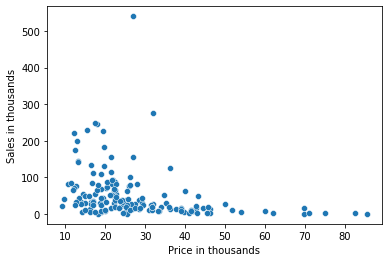

In [48]:
sns.scatterplot(x='Price in thousands' , y ='Sales in thousands' , data=df)

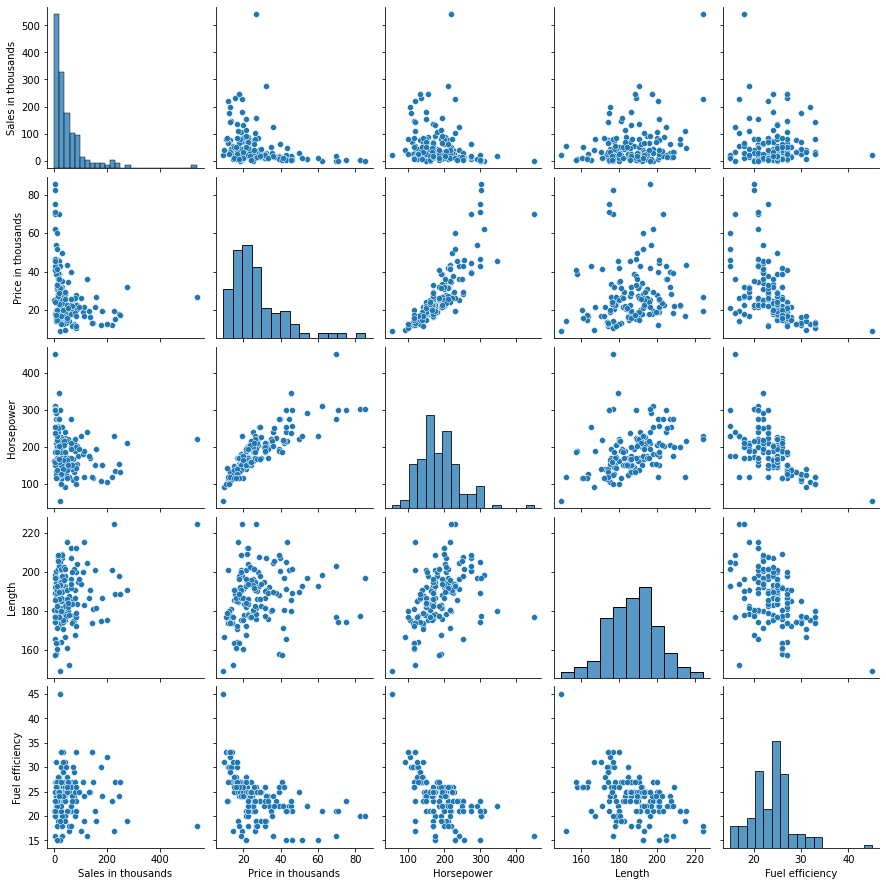

In [49]:
sns.pairplot(df_num)

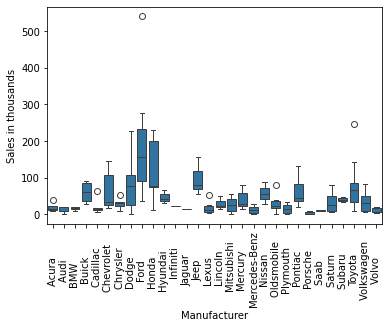

In [51]:
sns.boxplot(x='Manufacturer' , y = 'Sales in thousands' , data=df)
plt.xticks(rotation = 90)
plt.show()

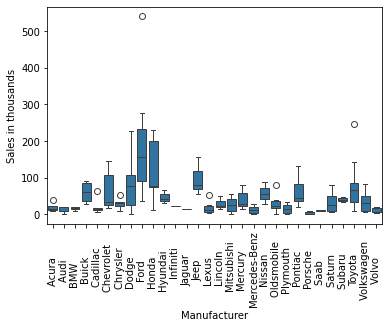

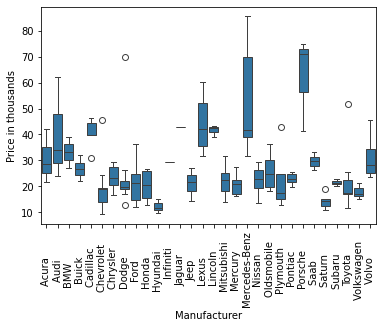

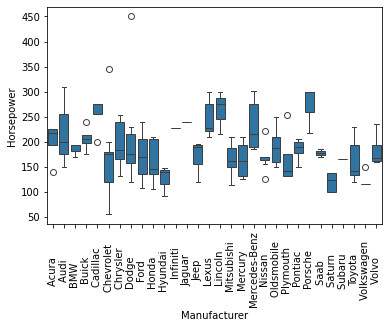

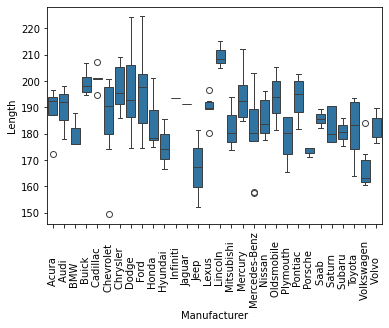

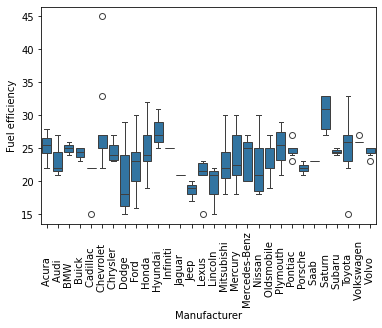

In [52]:
for col in df_num:
    sns.boxplot(x='Manufacturer' , y=col , data=df)
    plt.xticks(rotation = 90)
    plt.show()

In [54]:
x = df.drop('Sales in thousands', axis=1)
y=df['Sales in thousands']

In [55]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
cols = x.select_dtypes(include=['object'])

for col in cols:
    if col != 'Vehicle type':
        x[col] = label.fit_transform(x[col])

In [57]:
x.dtypes

Manufacturer             int64
Model                    int64
4-year resale value      int64
Vehicle type            object
Price in thousands     float64
Engine size              int64
Horsepower             float64
Wheelbase                int64
Width                    int64
Length                 float64
Curb weight              int64
Fuel capacity            int64
Fuel efficiency        float64
Latest Launch            int64
dtype: object

In [58]:
x = pd.get_dummies(df,columns=['Vehicle type'])